In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os #This line imports the os library, which provides a way of using operating system dependent functionality.
for dirname, _, filenames in os.walk('/kaggle/input'): #This is a for loop that uses the os.walk() method to traverse the directories in the Kaggle input folder.
    for filename in filenames: #This is a nested for loop that iterates over the filenames in each directory encountered by the outer for loop
        print(os.path.join(dirname, filename)) #This line prints the full path of each file in the directories and subdirectories in the Kaggle input folder by joining the directory name and filename using the os.path.join() method. This information can be used to read in data files using the appropriate functions provided by Pandas or other libraries.

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
plt.rcParams.update({'font.size': 14})
from datetime import datetime, timedelta
import seaborn as sns # Data Visualization

In [10]:
train_proteins = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

train_peptides = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_peptides.csv")

supplemental_clinical_data = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv")

clinical_data = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")

Shape of the dataframe: (2223, 8)
First few rows of the dataframe:


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB
None
Summary statistics of numerical columns:
         patient_id  visit_month      updrs_1      updrs_2      updrs_3  \
count   2223.00000

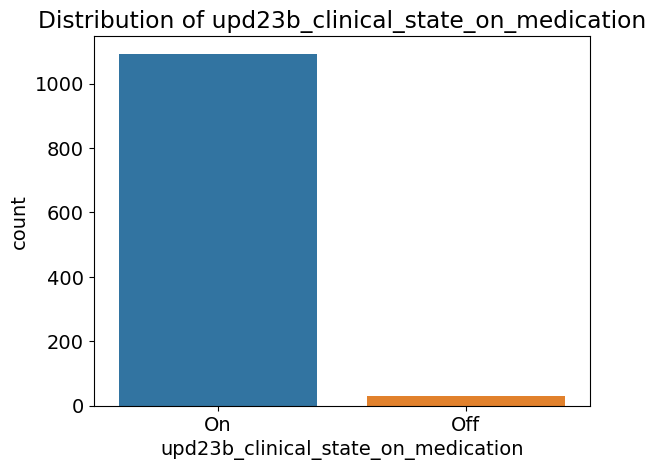

In [12]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv")

# Check the dimensions of the dataframe
print("Shape of the dataframe:", df.shape)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
display(df.head())

# Check the data types and missing values in the dataframe
print("Data types and missing values:")
print(df.info())

# Check the summary statistics of the numerical columns in the dataframe
print("Summary statistics of numerical columns:")
print(df.describe())

# Visualize the distribution of the target variable 'upd23b_clinical_state_on_medication'
sns.countplot(x='upd23b_clinical_state_on_medication', data=df)
plt.title("Distribution of upd23b_clinical_state_on_medication")
plt.show()



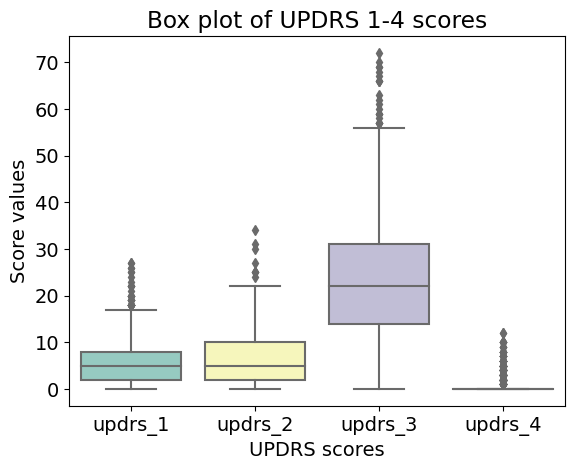

In [13]:
# Create a box plot for UPDRS 1-4 scores
sns.boxplot(data=df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']], palette='Set3')

# Set plot title and axis labels
plt.title('Box plot of UPDRS 1-4 scores')
plt.xlabel('UPDRS scores')
plt.ylabel('Score values')

# Show the plot
plt.show()

In [14]:
display(train_proteins.head().style.set_caption("Train proteins Data"))
print("\n")

display(train_peptides.head().style.set_caption("Train peptides Data"))
print("\n")

display(supplemental_clinical_data.head().style.set_caption("Supplemntal_clinical Data"))
print("\n")

display(clinical_data.head().style.set_caption("Clinical Data"))

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.300000
1,55_0,0,55,O00533,732430.000000
2,55_0,0,55,O00584,39585.800000
3,55_0,0,55,O14498,41526.900000
4,55_0,0,55,O14773,31238.000000


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.300000
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.000000
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.000000
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.900000
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.700000


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.000000,3.000000,16.000000,0.000000,nan
1,35_36,35,36,6.000000,4.000000,20.000000,0.000000,nan
2,75_0,75,0,4.000000,6.000000,26.000000,0.000000,nan
3,75_36,75,36,1.000000,8.000000,38.000000,0.000000,On
4,155_0,155,0,nan,nan,0.000000,nan,nan


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.000000,6.000000,15.000000,nan,nan
1,55_3,55,3,10.000000,7.000000,25.000000,nan,nan
2,55_6,55,6,8.000000,10.000000,34.000000,nan,nan
3,55_9,55,9,8.000000,9.000000,30.000000,0.000000,On
4,55_12,55,12,10.000000,10.000000,41.000000,0.000000,On


In [15]:
train_proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [16]:
train_proteins.describe()

,visit_month,patient_id,NPX
count,232741.000000,232741.000000,2.327410e+05
mean,26.099205,32593.881873,2.712077e+06
std,22.874719,18608.479506,2.224155e+07
min,0.000000,55.000000,8.460820e+01
25%,6.000000,16566.000000,2.946440e+04
50%,24.000000,29313.000000,1.135560e+05
75%,48.000000,49995.000000,5.638940e+05
max,108.000000,65043.000000,6.138510e+08


In [17]:
train_peptides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [18]:
train_peptides.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


In [19]:
supplemental_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [20]:
supplemental_clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2223.000000,2223.000000,2010.000000,2009.000000,2218.000000,1295.000000
mean,32478.016194,12.910481,5.684080,6.507715,22.917944,0.840154
std,18637.562796,13.060532,4.366964,4.968132,12.342596,1.860247
min,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16703.000000,0.000000,2.000000,2.000000,14.000000,0.000000
50%,32915.000000,6.000000,5.000000,5.000000,22.000000,0.000000
75%,47243.000000,24.000000,8.000000,10.000000,31.000000,0.000000
max,65530.000000,36.000000,27.000000,34.000000,72.000000,12.000000


Shape of the dataframe: (2615, 8)
First few rows of the dataframe:


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB
None
Summary statistics of numerical columns:
         patient_id  visit_month      updrs_1     updrs_2      updrs_3  \
count   2615.000000

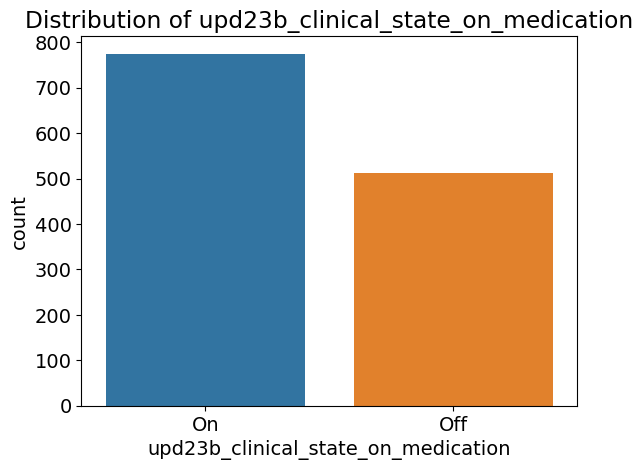

In [21]:
# Load the dataset into a pandas dataframe
df1 = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")

# Check the dimensions of the dataframe
print("Shape of the dataframe:", df1.shape)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
display(df1.head())

# Check the data types and missing values in the dataframe
print("Data types and missing values:")
print(df1.info())

# Check the summary statistics of the numerical columns in the dataframe
print("Summary statistics of numerical columns:")
print(df1.describe())

# Visualize the distribution of the target variable 'upd23b_clinical_state_on_medication'
sns.countplot(x='upd23b_clinical_state_on_medication', data=df1)
plt.title("Distribution of upd23b_clinical_state_on_medication")
plt.show()

In [22]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


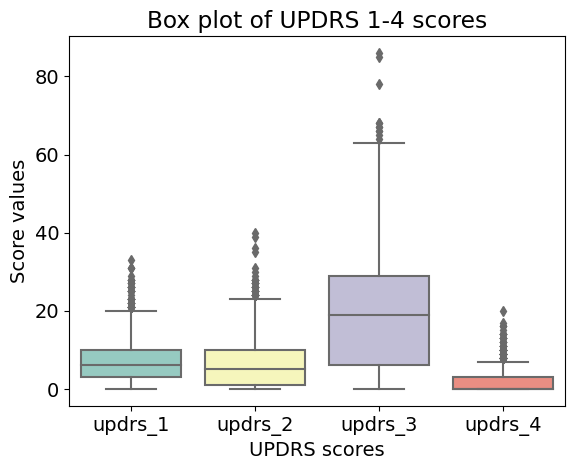

In [23]:
# Create a box plot for UPDRS 1-4 scores
sns.boxplot(data=df1[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']], palette='Set3')

# Set plot title and axis labels
plt.title('Box plot of UPDRS 1-4 scores')
plt.xlabel('UPDRS scores')
plt.ylabel('Score values')

# Show the plot
plt.show()

In [24]:
clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


In [25]:
print("train_proteins columns: ",list(train_proteins.columns))
print("train_peptides columns : ",list(train_peptides.columns))
print("cinical_data columns: ",list(clinical_data.columns))
print("supplemental_clinical_data columns: ",list(supplemental_clinical_data.columns))

train_proteins columns:  ['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX']
train_peptides columns :  ['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide', 'PeptideAbundance']
cinical_data columns:  ['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication']
supplemental_clinical_data columns:  ['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication']


In [26]:
protein_patients = set(train_proteins["patient_id"].to_list())
peptide_patients = set(train_peptides["patient_id"].to_list())
clinical_patients = set(clinical_data["patient_id"].to_list())

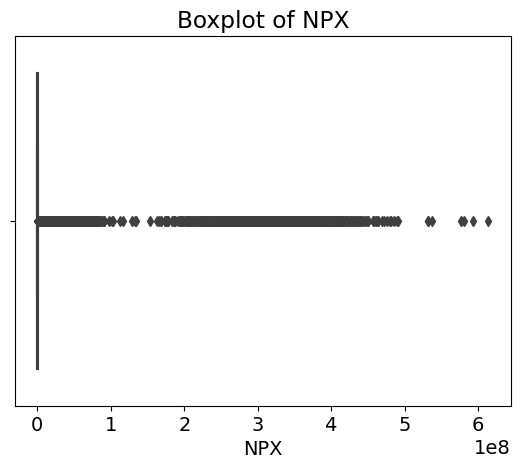

In [27]:
sns.boxplot(x=train_proteins['NPX'])
plt.xlabel('NPX')
plt.title('Boxplot of NPX')
plt.show()

In [28]:
if clinical_patients == protein_patients and protein_patients == peptide_patients and peptide_patients == clinical_patients:
  print("All Ids for patients in clinical, train_proteins and train_peptide datasets are same.")

All Ids for patients in clinical, train_proteins and train_peptide datasets are same.


In [29]:
sup_patients = supplemental_clinical_data["patient_id"].to_list()
peptide_patients = train_peptides["patient_id"].to_list()

shared_patients = []
for patients in sup_patients:
  if patients in clinical_patients:
    shared_patients.append(patients)

if shared_patients:
  print(f"Patient ids {shared_patients} are common in supplemental and other datasets")
else:
  print("Supplemental and rest of the datasets do not contain data for similar patients.")

Supplemental and rest of the datasets do not contain data for similar patients.


In [30]:
# Define a dictionary with dataframes and their corresponding names
dataframes = {'Clinical Data': clinical_data,
              'Peptide Data': train_peptides,
              'Protein Data': train_proteins}

avg_visits = {name: round(df.groupby('patient_id')['visit_id'].nunique().mean(), 3)
              for name, df in dataframes.items()}

# Print results
for name, avg in avg_visits.items():
    print(f'Average number of visits ({name}): {avg}')

Average number of visits (Clinical Data): 10.544
Average number of visits (Peptide Data): 4.488
Average number of visits (Protein Data): 4.488


In [31]:
train_proteins['visit_month'].unique().tolist()

[0, 3, 6, 12, 18, 24, 30, 36, 48, 54, 60, 72, 84, 96, 108]

In [32]:
# Check the data available for each visit_month
patients_per_month = train_proteins.groupby('visit_month')['patient_id'].nunique()
print(patients_per_month)

visit_month
0      194
3        3
6      124
12     180
18       8
24     173
30       1
36     149
48     138
54       2
60      84
72      21
84      30
96       2
108      4
Name: patient_id, dtype: int64


In [33]:
print(f'{train_proteins.isnull().any(axis = 1).sum()} null values in Train proteins dataset\n')

print(f'{train_peptides.isnull().any(axis = 1).sum(axis = 0)} null values in Train peptides dataset\n')

print(f'{supplemental_clinical_data.isnull().any(axis = 1).sum(axis = 0)} null values in supplemental_clinical dataset\n')

print(f'{clinical_data.isnull().any(axis = 1).sum(axis = 0)} null values in clinical dataset\n')

0 null values in Train proteins dataset

0 null values in Train peptides dataset

1406 null values in supplemental_clinical dataset

1356 null values in clinical dataset



In [34]:
# for each columns in the clinical_data, here are the counts of NaN values.
nan_updrs_1 = clinical_data['updrs_1'].isna().sum() 
nan_updrs_2 = clinical_data['updrs_2'].isna().sum()  
nan_updrs_3 = clinical_data['updrs_3'].isna().sum()   
nan_updrs_4 = clinical_data['updrs_4'].isna().sum()  
nan_medical = clinical_data['upd23b_clinical_state_on_medication'].isna().sum()   
nan_updrs_1,nan_updrs_2, nan_updrs_3, nan_updrs_4, nan_medical

(1, 2, 25, 1038, 1327)

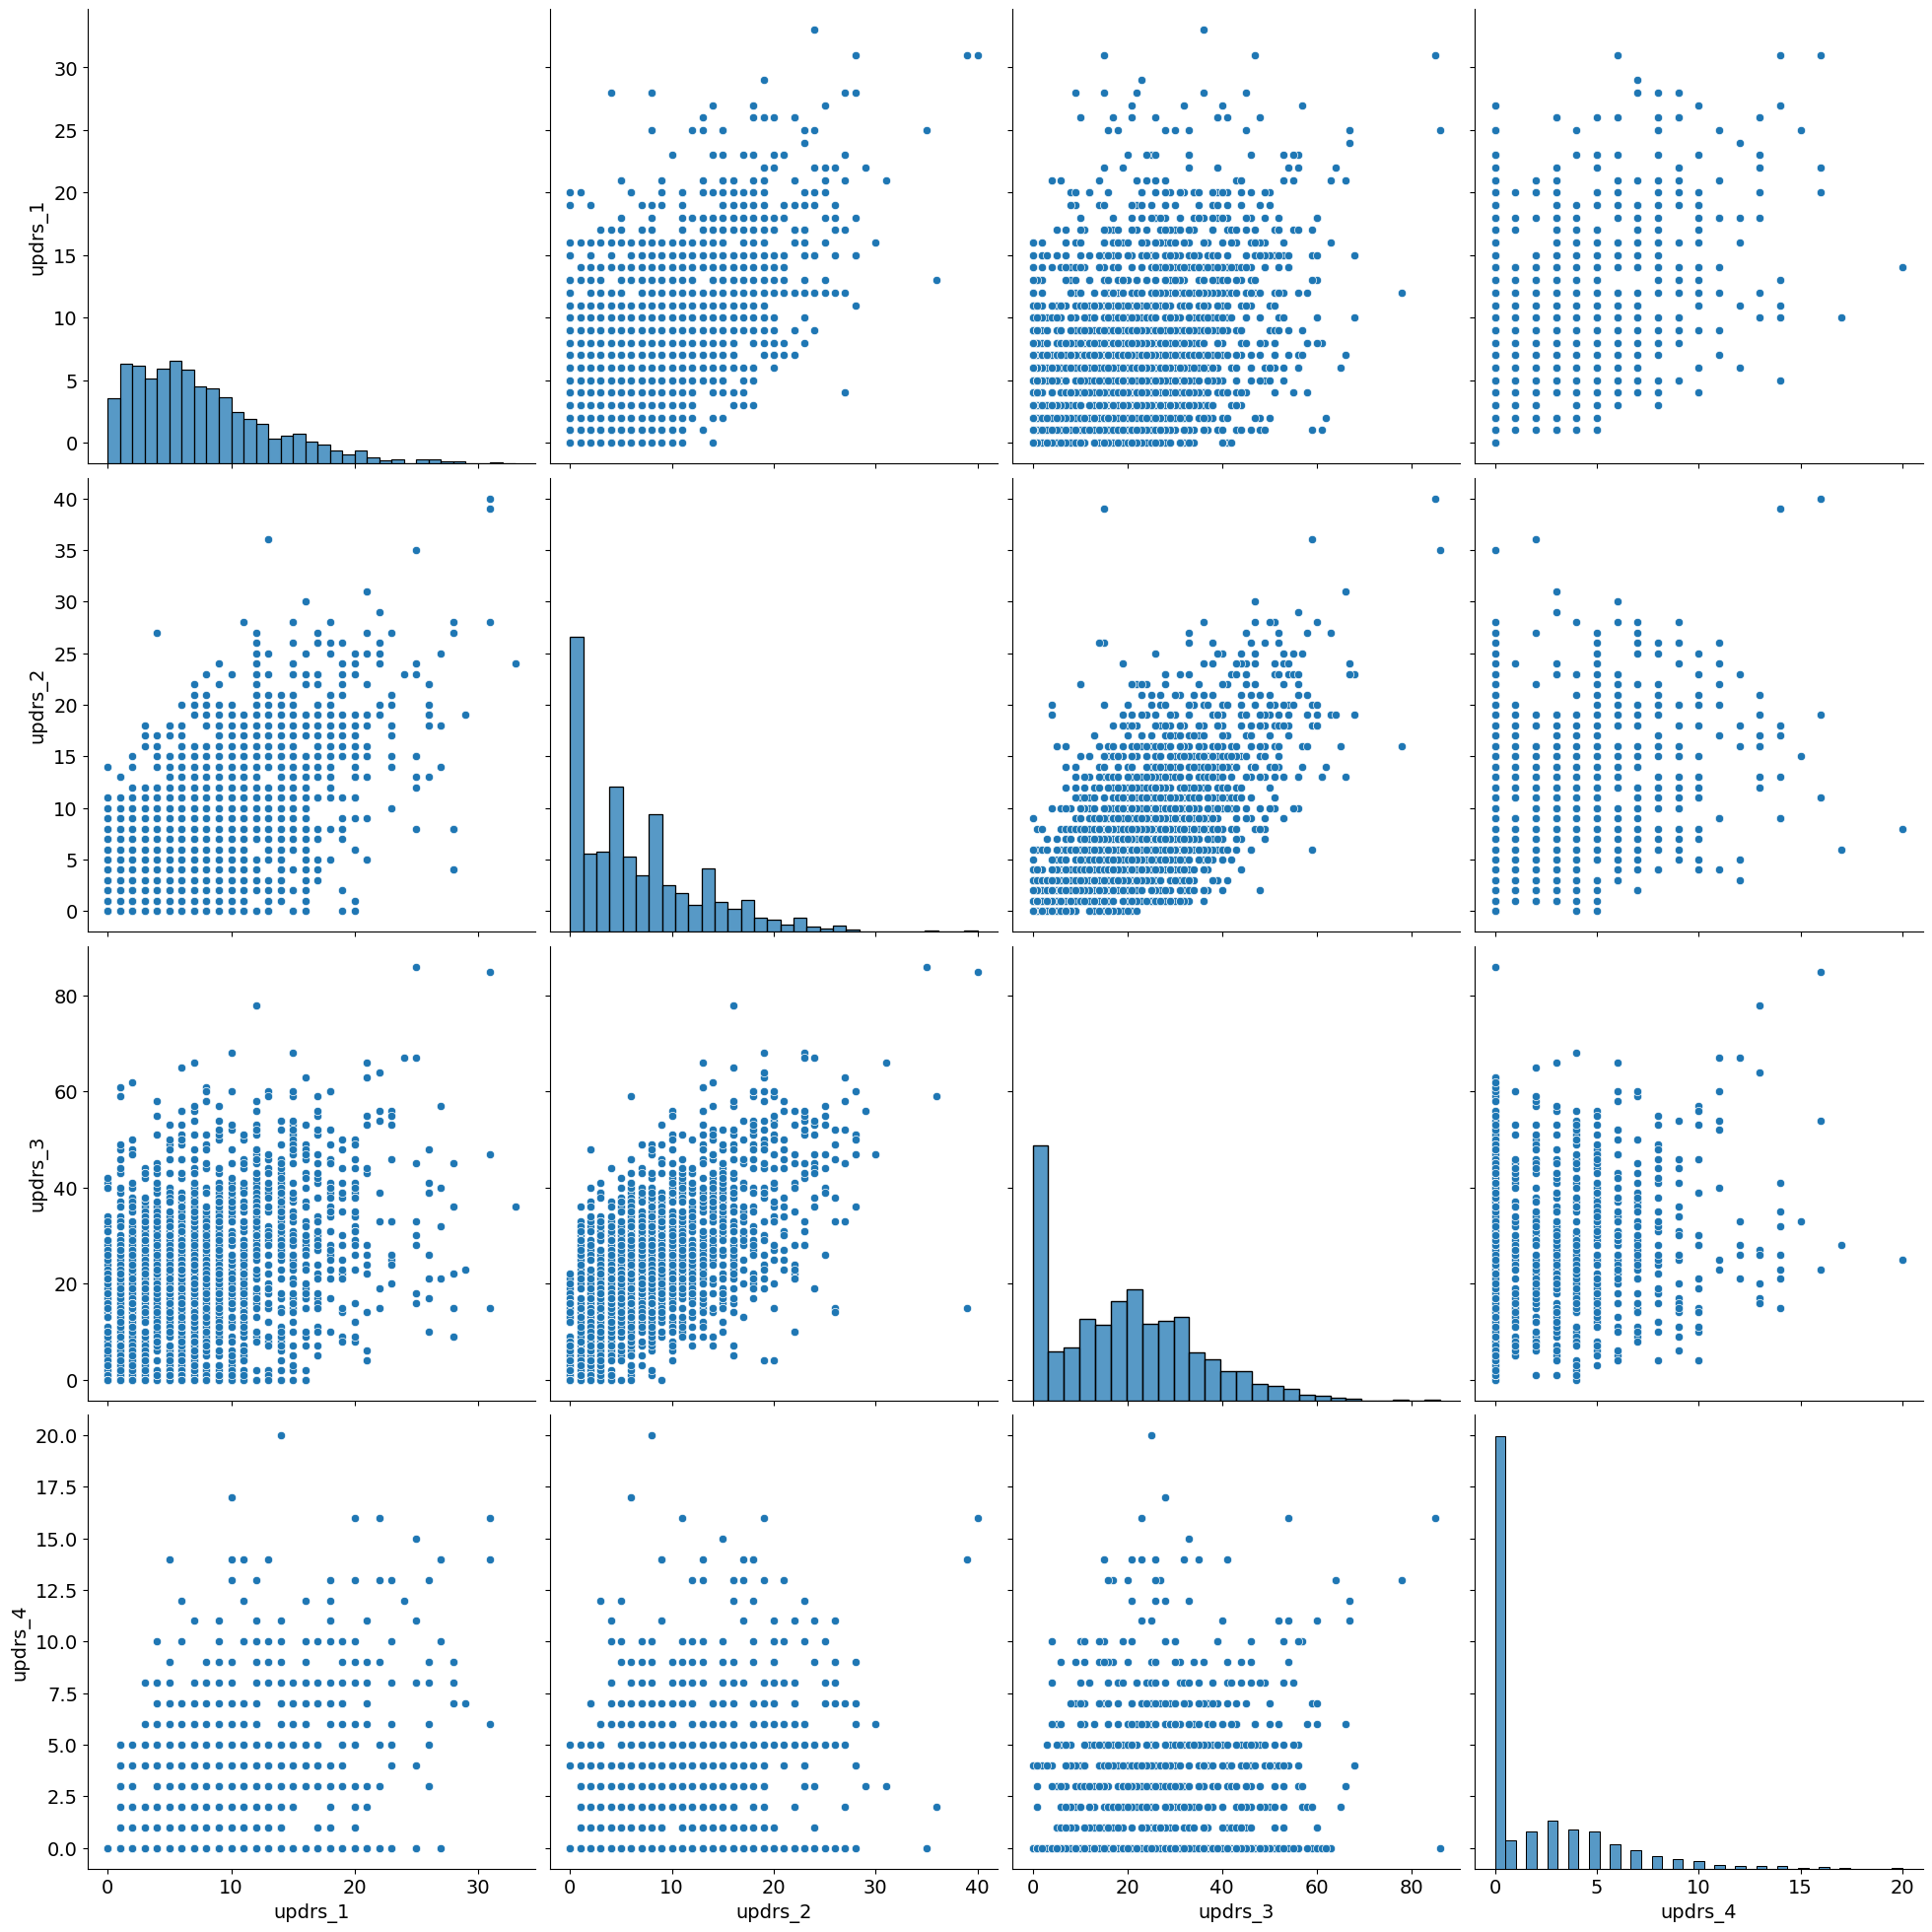

In [35]:
import seaborn as sns

height = 5
sns.pairplot(clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']], height=height)

In [36]:
num_zeros = (clinical_data['updrs_4']== 0).sum()

print("Number of 0 values in updrs_4 column: ", num_zeros)

Number of 0 values in updrs_4 column:  961


In [37]:
import sys

In [38]:
clinical_data_copy = clinical_data.copy()
supplemental_clinical_data_copy = supplemental_clinical_data.copy()
supplemental_clinical_data_copy['upd23b_clinical_state_on_medication'] = \
    supplemental_clinical_data_copy['upd23b_clinical_state_on_medication'].fillna('Null')
all_clinical_data = pd.concat([clinical_data_copy, supplemental_clinical_data_copy])
all_clinical_data['clinical_or_supplemental_clinical'] = 'clinical_data'
all_clinical_data['clinical_or_supplemental_clinical'][len(clinical_data):] = 'supplemental_clinical_data'
all_clinical_data

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/4210981718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_clinical_data['clinical_or_supplemental_clinical'][len(clinical_data):] = 'supplemental_clinical_data'


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,clinical_or_supplemental_clinical
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,clinical_data
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,clinical_data
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,clinical_data
3,55_9,55,9,8.0,9.0,30.0,0.0,On,clinical_data
4,55_12,55,12,10.0,10.0,41.0,0.0,On,clinical_data
...,...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,Null,supplemental_clinical_data
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,Null,supplemental_clinical_data
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,Null,supplemental_clinical_data
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,Null,supplemental_clinical_data


In [42]:
import plotly.express as px

features = [    'visit_month',    'upd23b_clinical_state_on_medication',    'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

for x in features:
    fig = px.histogram(all_clinical_data,
                       x=x,
                       color='clinical_or_supplemental_clinical',
                       title=f"<b>Count of {x}",
                       color_discrete_sequence=px.colors.qualitative.Vivid,
                       width=800, height=500)

    fig.update_layout(template="plotly_dark",
                      title_font_size=20,
                      xaxis_title=x,
                      yaxis_title="Count",
                      legend_title="Data Type",
                      font=dict(family="Arial, sans-serif", size=12, color="white"),
                      plot_bgcolor="#323130",
                      paper_bgcolor="#323130",
                      xaxis=dict(gridcolor="white"),
                      yaxis=dict(gridcolor="white"))

    fig.show()


In [40]:
full_clinical_data = pd.concat([supplemental_clinical_data, clinical_data])

full_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [41]:
pivoted_proteins = train_proteins.pivot(index = "visit_id", columns = "UniProt", values = "NPX")
pivoted_proteins

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.10,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400290.0,24240.10,NaN,16943.50,6303.17,77493.6,46435.3,254247.0,138910.0,...,NaN,25690.60,NaN,6859.82,19106.7,121161.0,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.7,234094.0,82410.4,19183.7,17804.10,12277.00
942_24,NaN,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.6,256654.0,76931.9,19168.2,19215.90,14625.60


In [43]:
pivoted_proteins_patients = pivoted_proteins.index.to_list()

In [44]:
patient_id = []
visiting_month = []
for idz in pivoted_proteins_patients:
  idz = idz.split("_")
  patient_id.append(idz[0])
  visiting_month.append(idz[1])

In [45]:
pivoted_proteins["patient_id"] = patient_id
pivoted_proteins["visiting_month"] = visiting_month

In [46]:
pivoted_proteins.head()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7,patient_id,visiting_month
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40,10053,0
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80,10053,12
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70,10053,18
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,155619.0,14647.9,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42,10138,12
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,177619.0,17061.1,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55,10138,24


In [47]:
pivoted_proteins.groupby("patient_id").get_group("58648")

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7,patient_id,visiting_month
visit_id,,,,,,,,,,,,,,,,,,,,,
58648_0,NaN,170934.0,9965.06,38342.7,16825.7,5538.58,349699.0,NaN,171477.0,99852.5,...,94273.6,9552.67,13237.5,338039.0,81449.9,NaN,NaN,27786.80,58648,0
58648_108,12685.30,513141.0,30452.50,35444.3,19241.8,2152.87,234595.0,NaN,193626.0,136307.0,...,112449.0,14798.80,27387.8,369437.0,105830.0,NaN,21257.6,17953.10,58648,108
58648_12,NaN,323399.0,11975.60,29073.2,14567.0,NaN,124543.0,NaN,161431.0,73095.9,...,109082.0,NaN,17670.6,222246.0,87110.0,NaN,16943.7,25141.40,58648,12
58648_36,12190.50,460148.0,28451.10,27813.4,20206.0,3078.48,178429.0,NaN,161970.0,128531.0,...,108308.0,11605.80,29149.3,269427.0,65663.8,NaN,25613.1,5215.36,58648,36
58648_48,9852.39,433690.0,30118.80,31973.9,15704.8,2767.34,111610.0,NaN,194472.0,108371.0,...,131000.0,12519.20,17714.5,239354.0,71436.5,10763.5,25072.2,12099.80,58648,48
58648_6,NaN,157182.0,10244.90,23679.7,17641.4,2104.32,162581.0,NaN,111978.0,61878.4,...,81850.2,NaN,13918.2,168551.0,NaN,NaN,12987.7,9857.60,58648,6
58648_60,NaN,293805.0,25513.70,23002.7,13921.6,2694.11,82081.2,NaN,128052.0,107891.0,...,88226.4,10856.90,17441.6,190119.0,NaN,NaN,21083.3,16034.00,58648,60
58648_84,NaN,161275.0,12118.70,41560.2,19021.9,NaN,138248.0,NaN,133823.0,83678.4,...,138791.0,NaN,NaN,105061.0,96167.9,NaN,19129.3,23783.10,58648,84
58648_96,NaN,333580.0,30430.40,25850.7,12475.8,2201.56,108198.0,NaN,140745.0,102651.0,...,84608.9,9767.67,25472.6,199438.0,107253.0,NaN,20459.3,18764.10,58648,96


In [48]:
pivoted_peptides = train_peptides.pivot(index = "visit_id", columns = "Peptide", values = "PeptideAbundance")

pivoted_peptides.head()

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.0,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.2,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.2,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09


In [49]:
pivoted_peptides_patients = pivoted_proteins.index.to_list()

In [50]:
patient_id = []
visiting_month = []
for idz in pivoted_peptides_patients:
  idz = idz.split("_")
  patient_id.append(idz[0])
  visiting_month.append(idz[1])

In [51]:
pivoted_peptides["patient_id"] = patient_id
pivoted_peptides["visiting_month"] = visiting_month

In [52]:
pivoted_peptides.head()

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,patient_id,visiting_month
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30,10053,0
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80,10053,12
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.0,19787.3,36029.4,708729.0,5067790.0,30838.2,...,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70,10053,18
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.2,66662.3,55253.9,79575.5,6201210.0,26720.0,...,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98,10138,12
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.2,63672.7,36819.8,34160.9,2117430.0,15645.2,...,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09,10138,24


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [55]:
columns_to_scale = ['visit_month', 'patient_id', 'NPX']
scaler = MinMaxScaler()
proteins_data_copy = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_proteins.csv")
proteins_data_copy[columns_to_scale] = scaler.fit_transform(proteins_data_copy[columns_to_scale])

In [56]:
proteins_data_copy.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0.0,0.0,O00391,0.000018
1,55_0,0.0,0.0,O00533,0.001193
2,55_0,0.0,0.0,O00584,0.000064
3,55_0,0.0,0.0,O14498,0.000068
4,55_0,0.0,0.0,O14773,0.000051


In [57]:
npx_original_data = train_proteins['NPX']

mean = np.mean(npx_original_data)
std = np.std(npx_original_data)
print("Mean of NPX data: ", mean)
print("Standard deviation of NPX data: ", std)

Mean of NPX data:  2712076.9438226623
Standard deviation of NPX data:  22241499.53555568


In [58]:
npx_normalized_data = proteins_data_copy['NPX']

mean = np.mean(npx_normalized_data)
std = np.std(npx_normalized_data)
print("Mean of normalized NPX normalized data: ", mean)
print("Standard deviation of NPX normalized data: ", std)

Mean of normalized NPX normalized data:  0.004417998356965372
Standard deviation of NPX normalized data:  0.036232738239641696


In [59]:
# now calculating range of normalized data
normalized_data_range = np.max(npx_normalized_data) - np.min(npx_normalized_data)
print("Range of normalized NPX data: ", normalized_data_range)

Range of normalized NPX data:  1.0


In [60]:
train_peptides['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108])

In [61]:
clinical_data['updrs_1'].max(),\
clinical_data['updrs_2'].max(),\
clinical_data['updrs_3'].max(),\
clinical_data['updrs_4'].max()

(33.0, 40.0, 86.0, 20.0)

In [62]:
clinical_data['upd23b_clinical_state_on_medication'].unique()

array([nan, 'On', 'Off'], dtype=object)

In [63]:
for month in clinical_data['visit_month'].unique():
    temp = (clinical_data['visit_month']==month)
    score = clinical_data[temp]['updrs_3'].unique()
    print(f'Month {month} score is {score}.')

Month 0 score is [15. 20. 25.  0.  9. 36. 21.  3. 17. 38. 18. 45. 16. 10. 11. 13.  2.  5.
 30.  1. 14. 41. 22. 12. 29. 33.  7. 19. 23. 28. 46. 39.  4.  6. 26.  8.
 40. 52. 24. 47. 32. 31. 34. 35. 27.].
Month 3 score is [25. 17. 14.  3. 21. 43. 12. 18. 19. 11. 40.  8. 13.  6. 45. 37. 20. 22.
  7. 32. 27. 23. 28. 33. 15. nan  5. 26. 30. 44. 29. 34. 10.  1.  9. 41.
 39. 16.  2. 31.].
Month 6 score is [34. 21. 30.  0. 12. 38. 23. 25. 56. 17. 47. 13. 19. 15. 20. 14.  5. 33.
  4.  1. 52.  7. 35. 16. 22. 32. 28.  9.  2. 29. 18.  8. nan 40. 36. 10.
 51. 27. 26. 37. 46. 11. 55. 31. 39.  3. 24. 50. 42. 43. 41.].
Month 9 score is [30. 11.  5. 24. 20. 26. 22. 19. 37. 17.  9. 13. 33. 40. 12. 21.  7. 18.
 16. 61. 29.  2. 50.  6. 27. 23. 15.  0. 60. 28. 32.  3. 35. 25.  1. 31.].
Month 12 score is [41. 25. 32.  1. 15. 29. 11.  0. 21.  4. 46. 17. 56. 19.  3.  9. 20. 12.
  8. 31. 27. 26.  7. 39.  6. 44. 10. 18. 23.  2. 36. 16. 34. 30. 68. 40.
 51. 14. 13. 22.  5. 35. 47. 43. 28. 67. 24. 33. nan 61. 45.]

In [64]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
clinical_data[targets].isnull().sum()

updrs_1       1
updrs_2       2
updrs_3      25
updrs_4    1038
dtype: int64

In [65]:
clinical_data[clinical_data['updrs_1'].isnull()]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
1827,45181_42,45181,42,NaN,NaN,0.0,NaN,NaN


In [66]:
clinical_data[clinical_data['updrs_2'].isnull()]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
1827,45181_42,45181,42,NaN,NaN,0.0,NaN,NaN
2472,60803_9,60803,9,0.0,NaN,29.0,0.0,NaN


In [67]:
clinical_data[clinical_data['updrs_3'].isnull()]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
251,7832_18,7832,18,5.0,5.0,NaN,NaN,NaN
345,10715_72,10715,72,18.0,12.0,NaN,0.0,On
436,12931_24,12931,24,3.0,3.0,NaN,0.0,NaN
601,15245_18,15245,18,10.0,14.0,NaN,NaN,NaN
635,16238_48,16238,48,6.0,2.0,NaN,NaN,NaN
777,18560_6,18560,6,0.0,3.0,NaN,NaN,NaN
846,20404_84,20404,84,1.0,8.0,NaN,4.0,On
848,20460_3,20460,3,17.0,11.0,NaN,0.0,NaN
919,21126_96,21126,96,13.0,9.0,NaN,NaN,NaN
1151,27079_36,27079,36,4.0,5.0,NaN,1.0,On


In [68]:
# Merge the proteins data and peptides data on the common columns.
merged_proteins_peptides = pd.merge(train_proteins, train_peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
merged = pd.merge(merged_proteins_peptides, clinical_data, on = ['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
merged

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


In [69]:
# Drop the specified columns from the train_clinical_data DataFrame
merge_drop = merged.drop(['upd23b_clinical_state_on_medication','patient_id','visit_month','visit_id','Peptide','UniProt','NPX'], axis=1)

In [70]:
merge_drop

,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4
0,11254.30,10.0,6.0,15.0,NaN
1,102060.00,10.0,6.0,15.0,NaN
2,174185.00,10.0,6.0,15.0,NaN
3,27278.90,10.0,6.0,15.0,NaN
4,30838.70,10.0,6.0,15.0,NaN
...,...,...,...,...,...
941739,202820.00,6.0,0.0,0.0,NaN
941740,105830.00,6.0,0.0,0.0,NaN
941741,21257.60,6.0,0.0,0.0,NaN
941742,5127.26,6.0,0.0,0.0,NaN


In [71]:
# Fill missing values in the 'updrs_1' column of the train_clinical_data DataFrame with its median
merged['updrs_1'].fillna(merged['updrs_1'].median(), inplace=True)

# Count the number of missing values in the 'updrs_1' column of the train_clinical_data DataFrame
missing_values = merged['updrs_1'].isnull().sum()
missing_values

0

In [72]:
# Fill missing values in the 'updrs_2' column of the train_clinical_data DataFrame with its median
merged['updrs_2'].fillna(merged['updrs_2'].median(), inplace=True)

# Count the number of missing values in the 'updrs_2' column of the train_clinical_data DataFrame
missing_values_2 = merged['updrs_2'].isnull().sum()

missing_values_2

0

In [73]:
# Fill missing values in the 'updrs_3' column of the train_clinical_data DataFrame with its median
merged['updrs_3'].fillna(merged['updrs_3'].median(), inplace=True)

# Count the number of missing values in the 'updrs_3' column of the train_clinical_data DataFrame
missing_values_3 = merged['updrs_3'].isnull().sum()

missing_values_3

0

In [74]:
# Fill missing values in the 'updrs_4' column of the train_clinical_data DataFrame with its median
merged['updrs_4'].fillna(merged['updrs_4'].mean(), inplace=True)

# Count the number of missing values in the 'updrs_3' column of the train_clinical_data DataFrame
missing_values_4 = merged['updrs_4'].isnull().sum()

missing_values_4

0

In [75]:
merged['updrs_4']= missing_values_4

In [76]:
merged.head()

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,0,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,0,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,10.0,6.0,15.0,0,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,10.0,6.0,15.0,0,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.7,10.0,6.0,15.0,0,NaN


In [77]:
# Replace 'On' and 'Off' values in column with 1 and 0, respectively
merged['upd23b_clinical_state_on_medication'] =merged['upd23b_clinical_state_on_medication'].replace({'On': 1, 'Off': 0})

In [78]:
merged.head()

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,0,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,0,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,10.0,6.0,15.0,0,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,10.0,6.0,15.0,0,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.7,10.0,6.0,15.0,0,NaN


In [79]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
clinical_data[targets].isnull().sum()

updrs_1       1
updrs_2       2
updrs_3      25
updrs_4    1038
dtype: int64

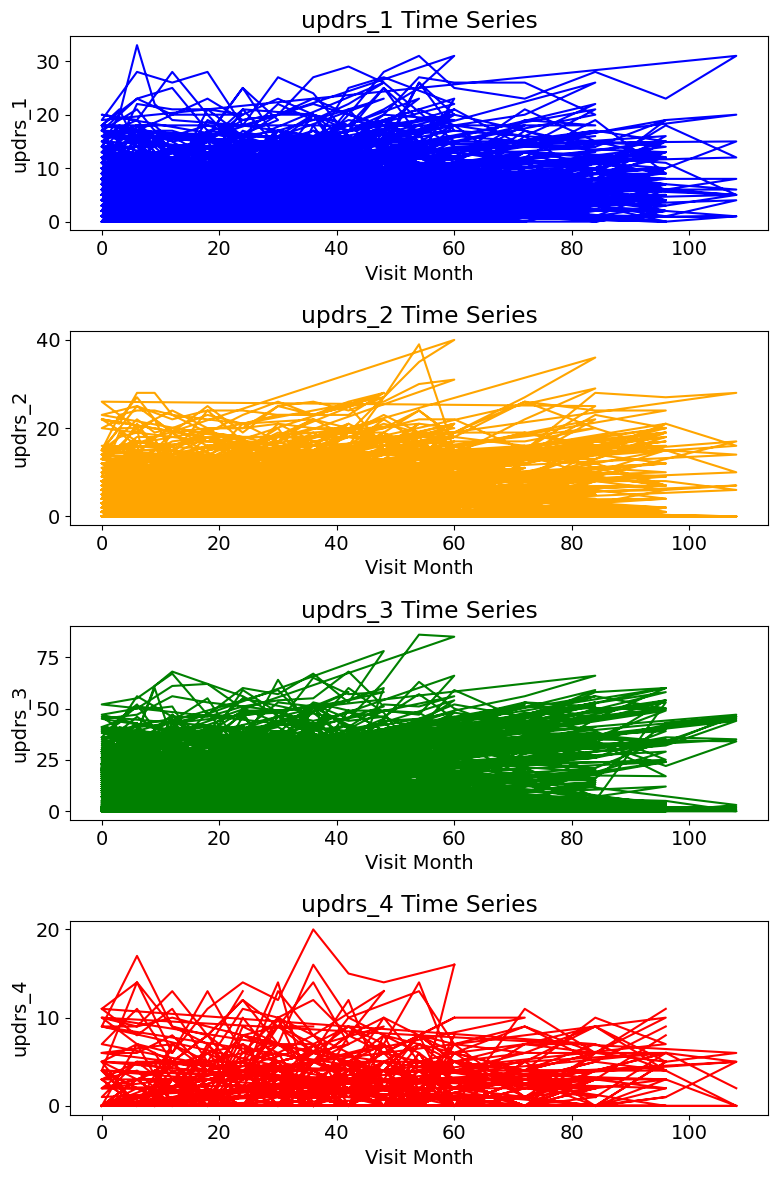

In [80]:
import matplotlib.pyplot as plt

# Create subplots for each target variable
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Time series plot for updrs_1
axs[0].plot(clinical_data['visit_month'], clinical_data['updrs_1'], color='blue')
axs[0].set_title('updrs_1 Time Series')
axs[0].set_xlabel('Visit Month')
axs[0].set_ylabel('updrs_1')

# Time series plot for updrs_2
axs[1].plot(clinical_data['visit_month'], clinical_data['updrs_2'], color='orange')
axs[1].set_title('updrs_2 Time Series')
axs[1].set_xlabel('Visit Month')
axs[1].set_ylabel('updrs_2')

# Time series plot for updrs_3
axs[2].plot(clinical_data['visit_month'], clinical_data['updrs_3'], color='green')
axs[2].set_title('updrs_3 Time Series')
axs[2].set_xlabel('Visit Month')
axs[2].set_ylabel('updrs_3')

# Time series plot for updrs_4
axs[3].plot(clinical_data['visit_month'], clinical_data['updrs_4'], color='red')
axs[3].set_title('updrs_4 Time Series')
axs[3].set_xlabel('Visit Month')
axs[3].set_ylabel('updrs_4')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [81]:
clinical_data['visit_month'].unique().tolist()

[0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108]

In [82]:
# Check the data available for each visit_month
patients_per_month = clinical_data.groupby('visit_month')['patient_id'].nunique()
print(patients_per_month)

visit_month
0      248
3      115
6      192
9       99
12     243
18     187
24     243
30     173
36     226
42     154
48     196
54     110
60     166
72      93
84     100
96      58
108     12
Name: patient_id, dtype: int64


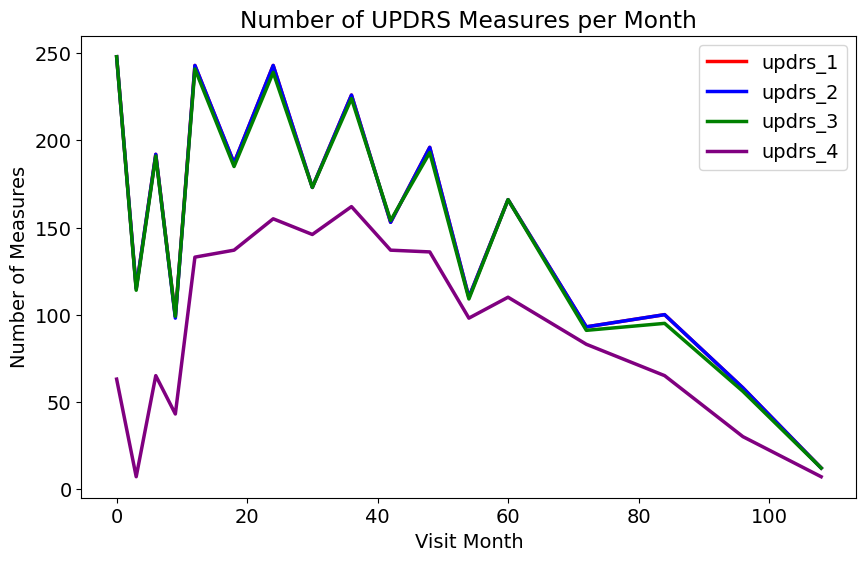

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

updrs_data_counts = clinical_data.groupby('visit_month').agg({'updrs_1': pd.Series.count,
                                                            'updrs_2': pd.Series.count,
                                                            'updrs_3': pd.Series.count,
                                                            'updrs_4': pd.Series.count})
fig, ax = plt.subplots(figsize=(10, 6))

updrs_data_counts.plot(ax=ax, linewidth=2.5, color=['red', 'blue', 'green', 'purple'])
ax.set_xlabel('Visit Month')
ax.set_ylabel('Number of Measures')
ax.set_title('Number of UPDRS Measures per Month')

plt.show()


In [84]:
months_of_interest = [0, 6, 12, 24, 36, 48, 60]

# Filter the clinical_data DataFrame for the months of interest
clinical_data_filtered = clinical_data[clinical_data['visit_month'].isin(months_of_interest)]

# Group the updrs_data_filtered DataFrame by patient_id and count the number of visits for each patient
visits_by_patient = clinical_data_filtered.groupby('patient_id')['visit_month'].count()

# Filter the visits_by_patient DataFrame for patients who have at least 5 visits within the months of interest
patients_with_five_visits = visits_by_patient[visits_by_patient >= 5].index

# Filter the updrs_data_filtered DataFrame for patients with at least 5 visits within the months of interest
clinical_data_filtered = clinical_data_filtered[clinical_data_filtered['patient_id'].isin(patients_with_five_visits)]

# Update the patients_per_months table
patients_per_month = clinical_data_filtered.groupby('visit_month')['patient_id'].nunique()
print(patients_per_month)

visit_month
0     230
6     179
12    226
24    229
36    223
48    196
60    164
Name: patient_id, dtype: int64


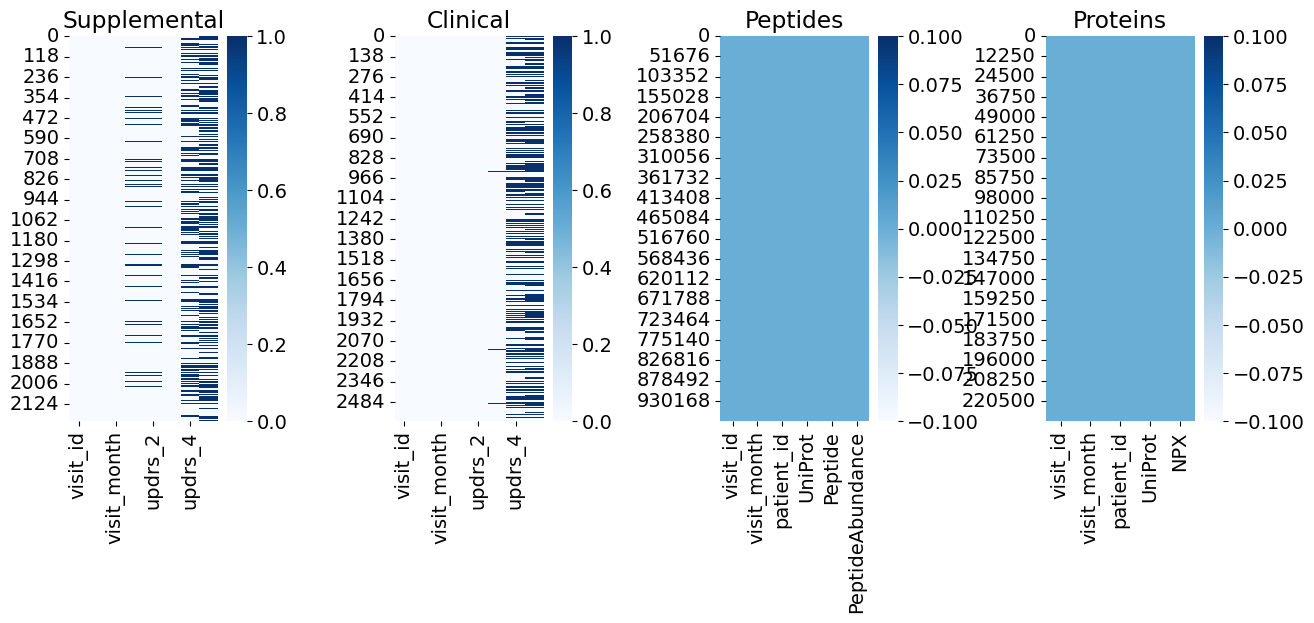

In [85]:
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.75)

# Set the color palette
cmap = 'Blues'

# Create heatmaps of null values in each dataset and assign them to the respective subplots
sns.heatmap(supplemental_clinical_data.isnull(), ax=axs[0], cmap=cmap)
sns.heatmap(clinical_data.isnull(), ax=axs[1], cmap=cmap)
sns.heatmap(train_peptides.isnull(), ax=axs[2], cmap=cmap)
sns.heatmap(train_proteins.isnull(), ax=axs[3], cmap=cmap)

# Set titles for each subplot
axs[0].set_title('Supplemental')
axs[1].set_title('Clinical')
axs[2].set_title('Peptides')
axs[3].set_title('Proteins')

# Display the subplots
plt.show()


In [86]:
# Calculate mean of 'updrs_4' column
mean_updrs_4 = clinical_data['updrs_4'].mean()

# Fill null values with mean
clinical_data['updrs_4'].fillna(mean_updrs_4, inplace=True)
clinical_data_imputed = clinical_data.copy()

In [87]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
clinical_data[targets].isnull().sum()

updrs_1     1
updrs_2     2
updrs_3    25
updrs_4     0
dtype: int64

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/3415825397.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



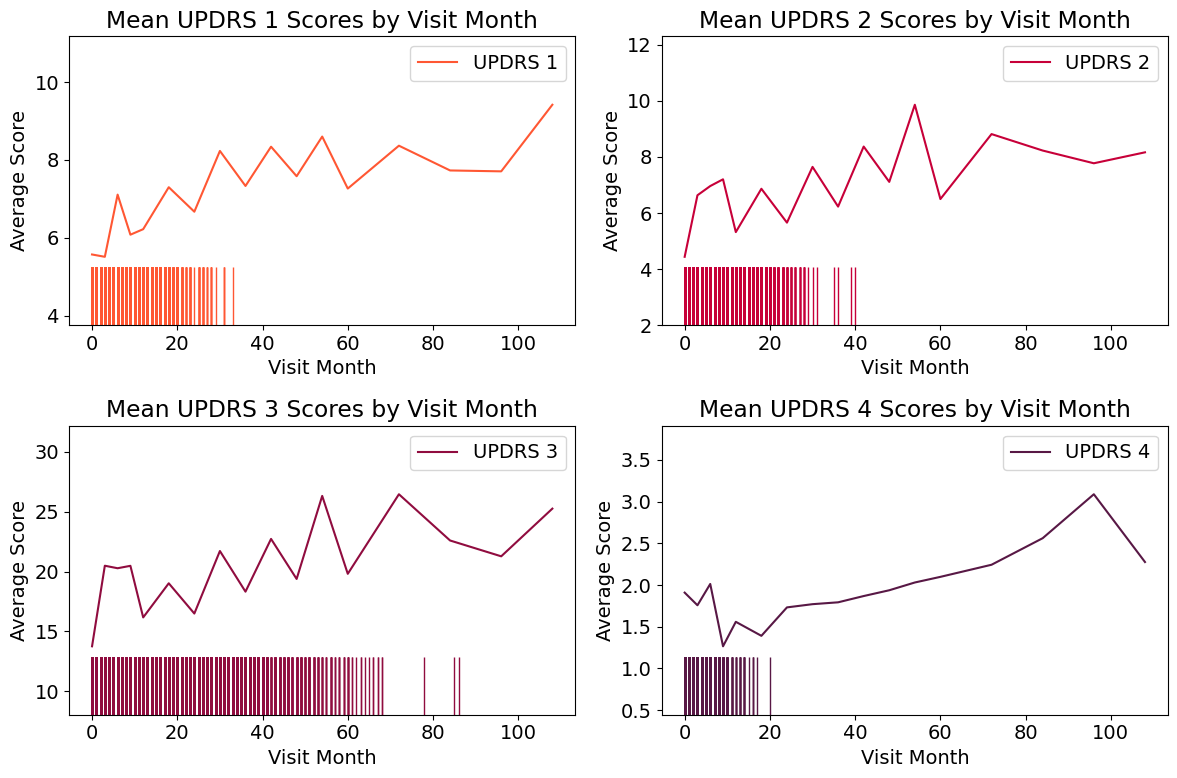

In [88]:
def plot_clinical_y(final):
  
    # Group data by visit_month and compute the average values for updrs_1, updrs_2, updrs_3, and updrs_4
    grouped_data = final.groupby('visit_month').mean()[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

    colors = ['#FF5733', '#C70039', '#900C3F', '#581845'] # Set custom colors for the plot

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    for i, ax in enumerate(axs.flatten()):
        ax.plot(grouped_data.index, grouped_data.iloc[:, i], color=colors[i], label=f'UPDRS {i+1}')
        sns.rugplot(final[f'updrs_{i+1}'], height=0.2, ax=ax, color=colors[i])
        ax.set(title=f'Mean UPDRS {i+1} Scores by Visit Month', xlabel='Visit Month', ylabel='Average Score')
        ax.legend()
    fig.tight_layout()
    plt.show()

plot_clinical_y(clinical_data)


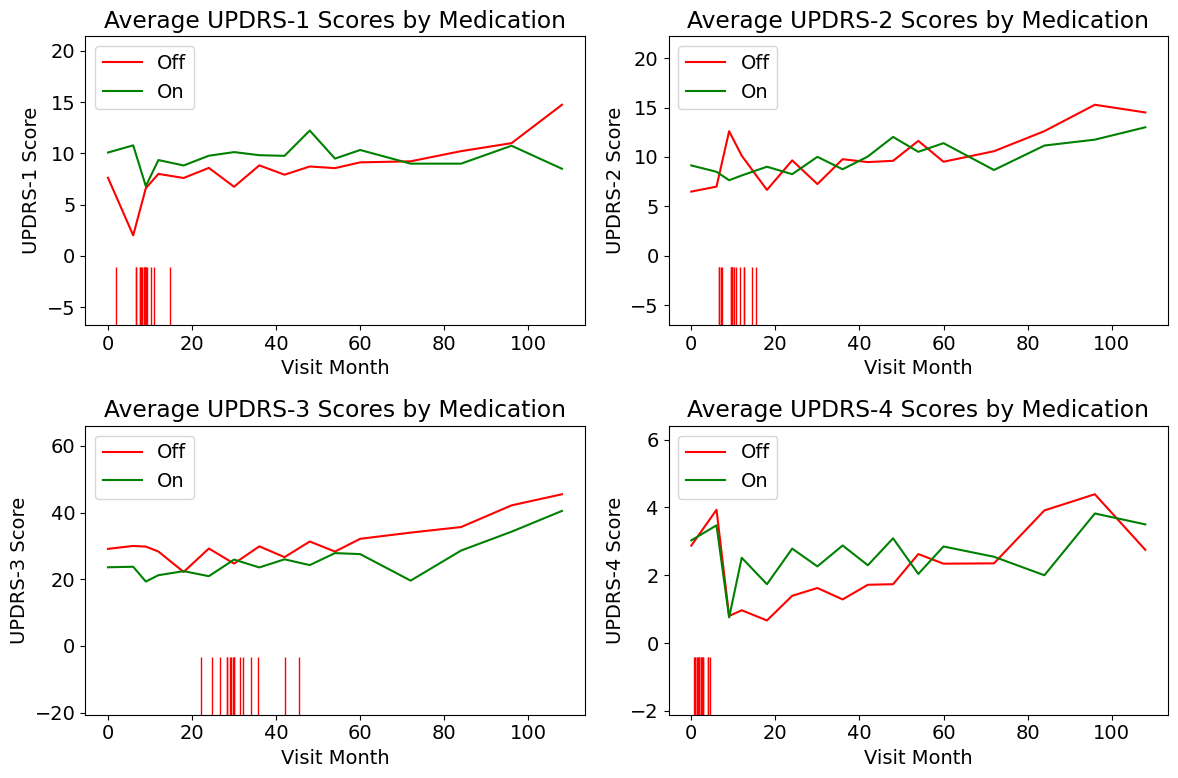

In [89]:
def plot_clinical_y1(final):
    df_off = final[final['upd23b_clinical_state_on_medication'] == 'Off']
    df_on = final[final['upd23b_clinical_state_on_medication'] == 'On']

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    subplot_titles = ['Average UPDRS-1 Scores by Medication', 'Average UPDRS-2 Scores by Medication',
                      'Average UPDRS-3 Scores by Medication', 'Average UPDRS-4 Scores by Medication']
    for i, ax in enumerate(axs.flat):
        ax.set_title(subplot_titles[i])
        ax.set_xlabel('Visit Month')
        ax.set_ylabel(f'UPDRS-{i+1} Score')

    for i, updrs in enumerate(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']):
        ax = axs[i//2, i%2]
        sns.rugplot(df_off.groupby('visit_month')[updrs].mean(), height=0.2, ax=ax, color='red')
        ax.plot(df_off.groupby('visit_month')[updrs].mean(), label='Off', color='red')
        ax.plot(df_on.groupby('visit_month')[updrs].mean(), label='On', color='green')
        ax.legend()

    fig.tight_layout()
    plt.show()

plot_clinical_y1(clinical_data)


In [90]:
protein_count = train_proteins['UniProt'].nunique()
patient_count = train_proteins['patient_id'].nunique()

mean_protein_count_per_patient = train_proteins.groupby('patient_id')['patient_id'].count().mean()
mean_protein_count_per_patient_visit = train_proteins.groupby(['patient_id', 'visit_month'])['patient_id'].count().mean()
print(f'Protein Count: {protein_count} - Patient Count: {patient_count} - Mean Protein Count Per Patient: {mean_protein_count_per_patient:.2f} - Mean Protein Count Per Patient-Visit: {mean_protein_count_per_patient_visit:.2f}')

Protein Count: 227 - Patient Count: 248 - Mean Protein Count Per Patient: 938.47 - Mean Protein Count Per Patient-Visit: 209.11


In [91]:
def visualize_continuous_data_histogram(df, column, log_scale=False):

    fig, ax = plt.subplots(figsize=(24, 6), dpi=100)
    x = df[column]
    if log_scale:
        x = np.log(x)
    sns.histplot(x, fill=True, log_scale=False, ax=ax)
    ax.tick_params(axis='x', labelsize=12.5)
    ax.tick_params(axis='y', labelsize=12.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    title = f'''
    {column}
    Mean: {df[column].mean():.2f}
    Median: {df[column].median():.2f}
    Std: {df[column].std():.2f}
    Min: {df[column].min():.2f}
    Max: {df[column].max():.2f}
    '''
    ax.set_title(title, size=20, pad=12.5)
    plt.show()

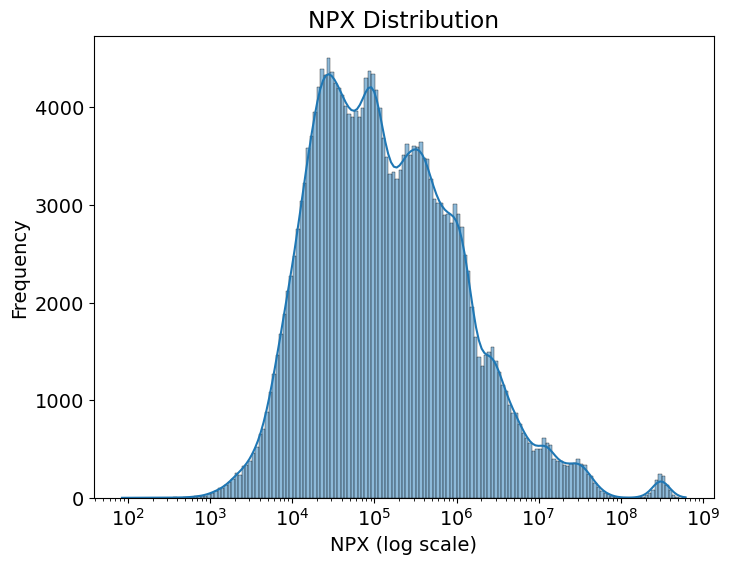

In [92]:
def visualize_continuous_data_histogram(df, column, log_scale=False):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Set color palette
    sns.set_palette('pastel')

    # Plot histogram
    if log_scale:
        ax.set_xscale('log')
        ax.set_xlabel(f'{column} (log scale)')
    else:
        ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    
    # Set title and display the plot
    ax.set_title(f'{column} Distribution')
    plt.show()
    
visualize_continuous_data_histogram(df=train_proteins, column='NPX', log_scale=True)

In [93]:
peptide_count = train_peptides['Peptide'].nunique()
protein_count = train_peptides['UniProt'].nunique()
patient_count = train_peptides['patient_id'].nunique()

mean_peptide_count_per_protein = train_peptides.groupby('UniProt')['Peptide'].count().mean()
mean_peptide_count_per_patient = train_peptides.groupby('patient_id')['Peptide'].count().mean()
mean_peptide_count_per_patient_visit = train_peptides.groupby(['patient_id', 'visit_month'])['Peptide'].count().mean()
print(f'Peptide Count: {peptide_count} - Protein Count: {protein_count} - Patient Count: {patient_count} - Mean Peptide Count Per Protein: {mean_peptide_count_per_protein:.2f} - Mean Peptide Count Per Patient: {mean_peptide_count_per_patient:.2f} - Mean Peptide Count Per Patient-Visit: {mean_peptide_count_per_patient_visit:.2f}')

Peptide Count: 968 - Protein Count: 227 - Patient Count: 248 - Mean Peptide Count Per Protein: 4325.26 - Mean Peptide Count Per Patient: 3959.01 - Mean Peptide Count Per Patient-Visit: 882.15


In [94]:
train_peptides.head(5)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [95]:
def visualize_value_counts(value_counts, title):
   
    fig, ax = plt.subplots(figsize=(24, 20), dpi=100)
    ax.barh(range(len(value_counts)), value_counts.values(), align='center')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks(range(len(value_counts)))
    ax.set_yticklabels([f'{x} ({value_count:,})' for x, value_count in value_counts.items()])
    ax.tick_params(axis='x', labelsize=15, pad=10)
    ax.tick_params(axis='y', labelsize=15, pad=10)
    ax.set_title(title, size=20, pad=15)
    plt.gca().invert_yaxis()
    plt.show()

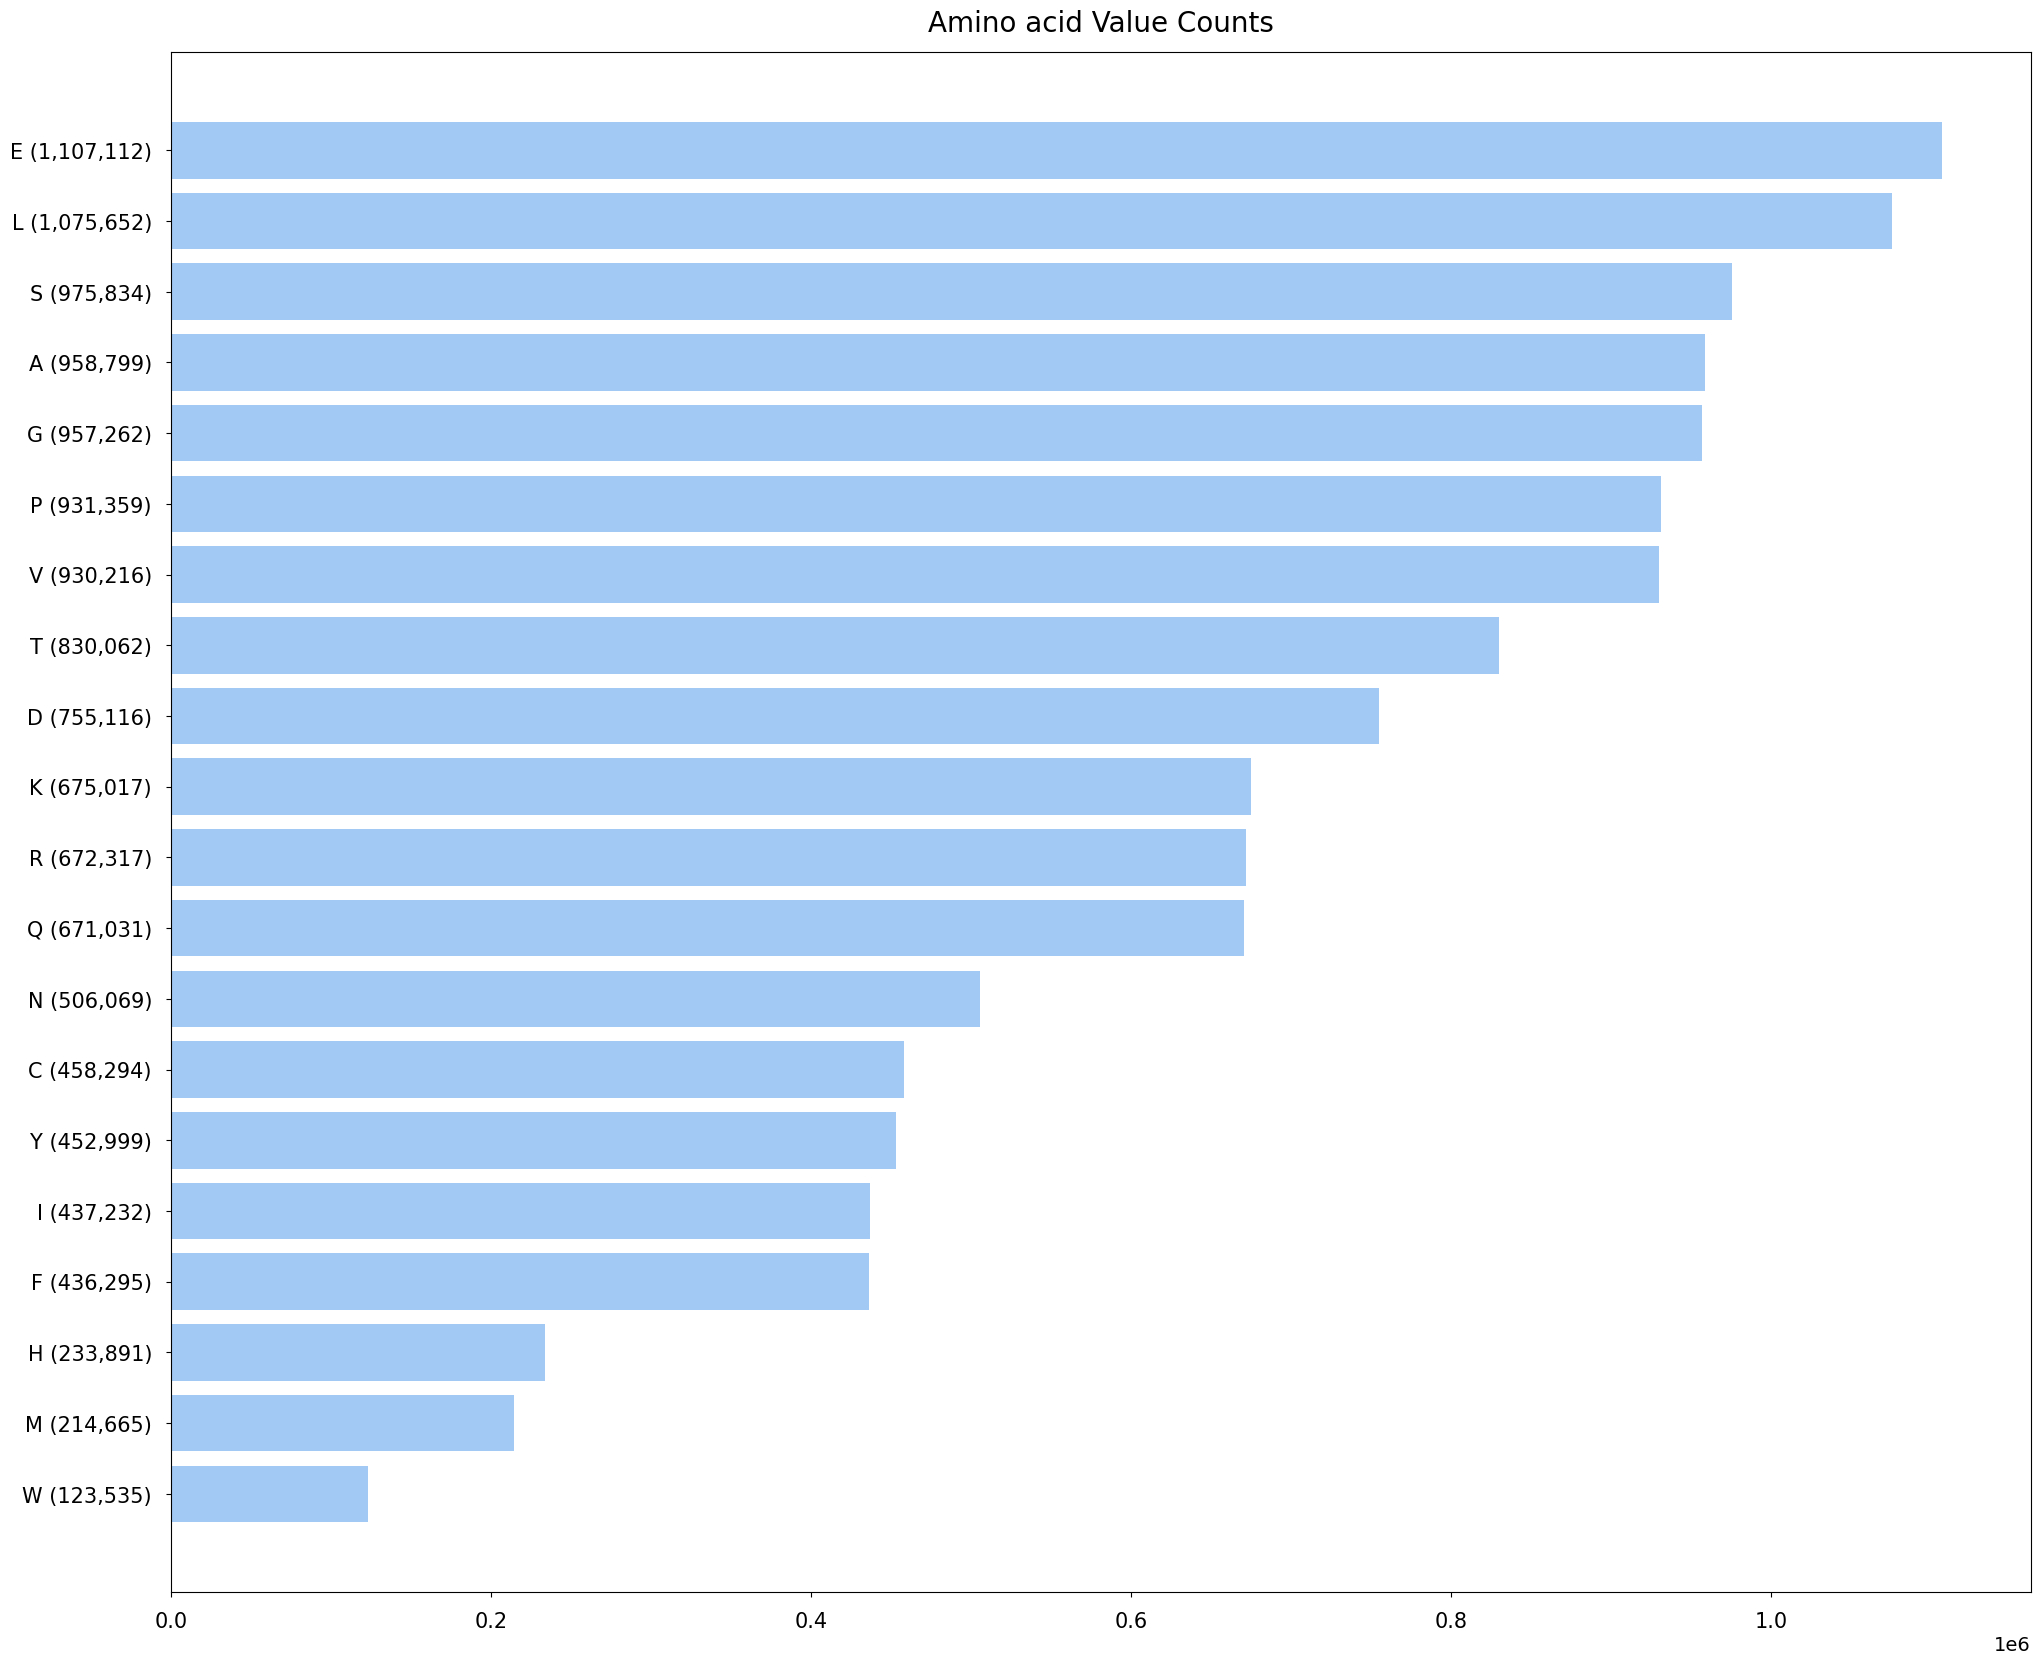

In [96]:
amino_acid_value_counts = train_peptides['Peptide'].str.replace(r'\(UniMod_\d+\)','',regex=True).apply(lambda x: list(x)).explode().value_counts().to_dict()
visualize_value_counts(amino_acid_value_counts, 'Amino acid Value Counts')

In [97]:
def visualize_categorical_column_counts(df, column):

    fig, ax = plt.subplots(figsize=(24, df[column].value_counts().shape[0] + 4), dpi=100)
    sns.barplot(
        y=df[column].value_counts().values,
        x=df[column].value_counts().index,
        color='tab:blue',
        ax=ax
    )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([
        f'{x} ({value_count:,})' for value_count, x in zip(
            df[column].value_counts().values,
            df[column].value_counts().index
        )
    ])
    ax.tick_params(axis='x', labelsize=15, pad=10)
    ax.tick_params(axis='y', labelsize=15, pad=10)
    ax.set_title(f'Counts {column}', size=20, pad=15)
    plt.show()

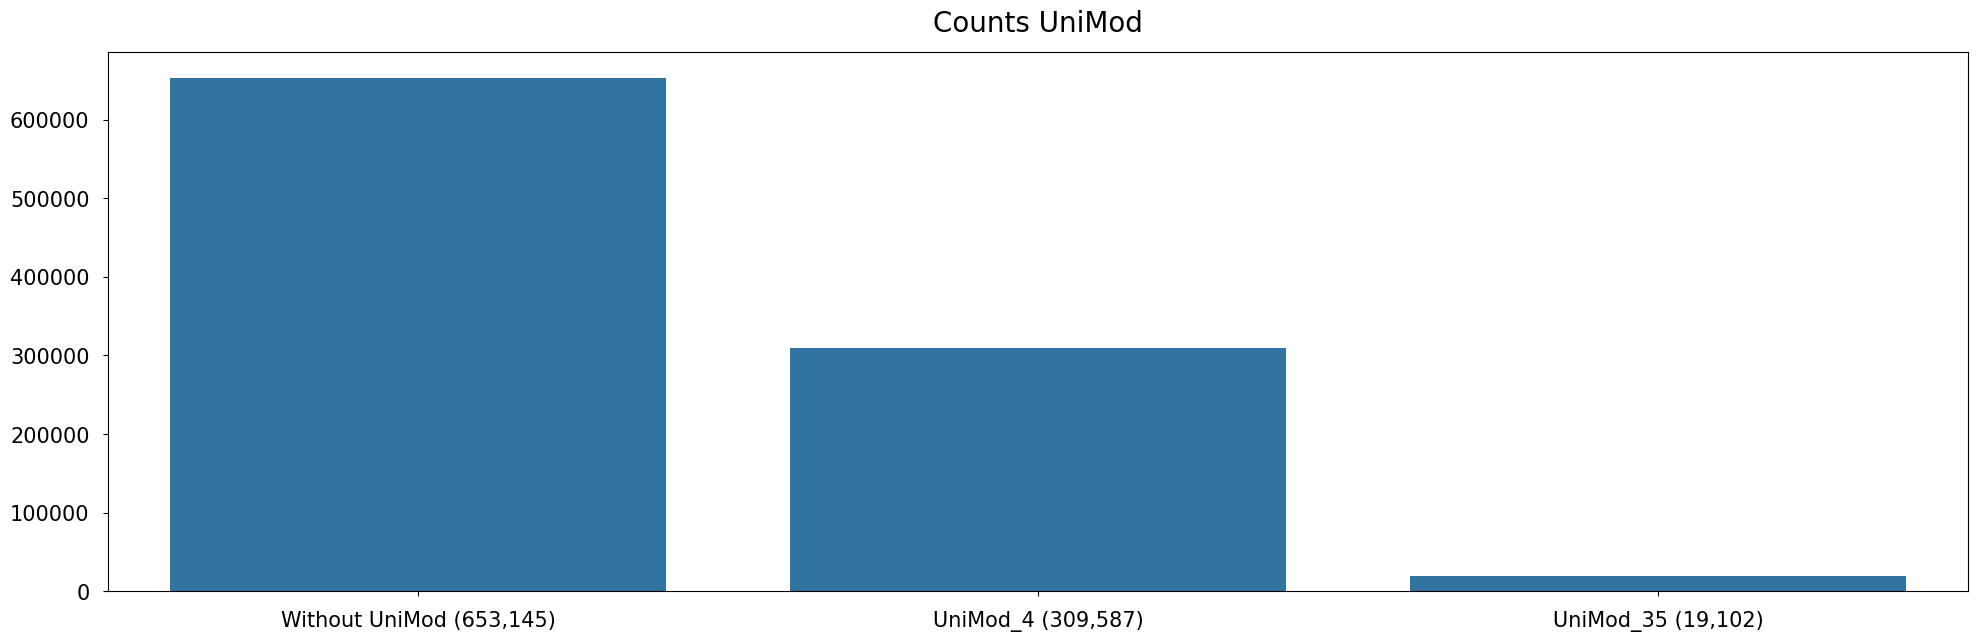

In [98]:
train_peptides['UniMod'] = 'Without UniMod'
train_peptides.loc[train_peptides['Peptide'].apply(lambda x: 'UniMod_35' in x), 'UniMod'] = 'UniMod_35'
train_peptides.loc[train_peptides['Peptide'].apply(lambda x: 'UniMod_4' in x), 'UniMod'] = 'UniMod_4'
visualize_categorical_column_counts(df=train_peptides, column='UniMod')

In [99]:
def smape(y_true, y_pred):
    if len(y_true) != len(y_pred):
      raise ValueError(f"diff lengths for true ({len(y_true)}) and pred ({len(y_pred)})")
    y_true = 1+y_true
    y_pred = 1+y_pred
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [100]:
merged

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,0,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,0,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,0,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,0,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,0,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,0,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,0,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,0,NaN


In [101]:
merged.isnull().sum()

visit_id                                    0
visit_month                                 0
patient_id                                  0
UniProt                                     0
NPX                                         0
Peptide                                     0
PeptideAbundance                            0
updrs_1                                     0
updrs_2                                     0
updrs_3                                     0
updrs_4                                     0
upd23b_clinical_state_on_medication    550019
dtype: int64

In [102]:
train_clinical_data = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
print(train_clinical_data.shape)
train_clinical_data.head()

(2615, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [104]:
temp_proteins = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/train_proteins.csv")
temp_proteins = temp_proteins.pivot(index=['visit_id', 'visit_month', 'patient_id'], 
          columns='UniProt', values='NPX').reset_index().rename_axis(None, axis=1)
temp_proteins = temp_proteins.dropna(axis=1).drop(columns=['visit_month', 'patient_id'])

In [105]:
merged_df = train_clinical_data.merge(temp_proteins, how='left', on='visit_id').dropna(subset=['O15240'])
print(merged_df.shape)
merged_df.head()

(1068, 35)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O15240,P01009,...,P02790,P05090,P06396,P07602,P10909,P23142,P41222,Q12805,Q92520,Q9UHG2
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,177775.0,14415900.0,...,4774060.0,9137820.0,2607410.0,1401860.0,11575700.0,1673460.0,33921600.0,1611130.0,982965.0,408698.0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,165638.0,13330800.0,...,5627420.0,8411730.0,2183310.0,1321860.0,10062500.0,1644680.0,34435000.0,1483200.0,860236.0,369870.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,151073.0,13225500.0,...,5953560.0,8682640.0,2792590.0,1496970.0,10753700.0,1916350.0,37906600.0,1547140.0,969345.0,318553.0
8,55_36,55,36,17.0,18.0,51.0,0.0,On,101056.0,13855000.0,...,6672980.0,9146830.0,2871610.0,1424390.0,11943000.0,1879000.0,32773700.0,1725030.0,910437.0,377550.0
15,942_6,942,6,8.0,2.0,21.0,NaN,NaN,160526.0,13667800.0,...,5755200.0,5415620.0,1636600.0,1090240.0,6855660.0,1085970.0,26674400.0,637932.0,639154.0,306621.0


In [109]:
#pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [110]:
import xgboost as xgb
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [111]:
FEATURES = merged_df.iloc[:, 8:].columns.tolist()
merged_df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O15240,P01009,...,P02790,P05090,P06396,P07602,P10909,P23142,P41222,Q12805,Q92520,Q9UHG2
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,177775.0,14415900.0,...,4774060.0,9137820.0,2607410.0,1401860.0,11575700.0,1673460.0,33921600.0,1611130.0,982965.0,408698.0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,165638.0,13330800.0,...,5627420.0,8411730.0,2183310.0,1321860.0,10062500.0,1644680.0,34435000.0,1483200.0,860236.0,369870.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,151073.0,13225500.0,...,5953560.0,8682640.0,2792590.0,1496970.0,10753700.0,1916350.0,37906600.0,1547140.0,969345.0,318553.0
8,55_36,55,36,17.0,18.0,51.0,0.0,On,101056.0,13855000.0,...,6672980.0,9146830.0,2871610.0,1424390.0,11943000.0,1879000.0,32773700.0,1725030.0,910437.0,377550.0
15,942_6,942,6,8.0,2.0,21.0,NaN,NaN,160526.0,13667800.0,...,5755200.0,5415620.0,1636600.0,1090240.0,6855660.0,1085970.0,26674400.0,637932.0,639154.0,306621.0


In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
model = {}
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for i in target:
        
    temp = merged.dropna(subset=[i]) 
    
    X = temp['visit_month']
    y = temp[i]
        
    trained = LinearRegression().fit(X.values.reshape(-1, 1), y)
    
    model[i] = trained

In [114]:
from xgboost import XGBRegressor

xgb_model = {}
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for i in target:
        
    temp = merged_df.dropna(subset=[i]).copy()
    
    X = temp['visit_month']
    temp["preds"] = np.ceil(model[i].predict(X.values.reshape(-1, 1)))
    
    X = temp[FEATURES + ['preds']]
    y = temp[i]
    
    xgb = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=1000)
    xgb.fit(X, y)
    
    xgb_model[i] = xgb

In [115]:
def get_predictions(my_train, model, xgb_model):

    my_train = my_train.fillna(0)
    
    for u in target:
        
        my_train['result_' + str(u)] = 0
        
        X = my_train["visit_month"]
        
        temp = my_train[FEATURES].copy()
        temp['preds'] = np.ceil(model[u].predict(X.values.reshape(-1, 1)))
        
        if u != 'updrs_4':
            mask = my_train[FEATURES].sum(axis=1) != 0
            my_train.loc[mask, 'result_' + str(u)] = xgb_model[u].predict(temp.loc[mask])
            my_train.loc[~mask, 'result_' + str(u)] = temp.loc[~mask, 'preds']
    
    result = pd.DataFrame()

    for m in [0, 6, 12, 24]:
        for u in [1, 2, 3, 4]:

            temp = my_train[["visit_id", "result_updrs_" + str(u)]].copy()
            temp["prediction_id"] = temp["visit_id"] + "_updrs_" + str(u) + "_plus_" + str(m) + "_months"
            temp["rating"] = temp["result_updrs_" + str(u)]
            temp = temp [['prediction_id', 'rating']]

            result = result.append(temp)            
    result = result.drop_duplicates(subset=['prediction_id', 'rating'])

    return result

In [116]:
get_predictions(merged_df, model, xgb_model).head()

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is de

,prediction_id,rating
0,55_0_updrs_1_plus_0_months,10.001880
2,55_6_updrs_1_plus_0_months,8.000726
4,55_12_updrs_1_plus_0_months,9.997879
8,55_36_updrs_1_plus_0_months,16.999895
15,942_6_updrs_1_plus_0_months,7.999674


In [117]:
#pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=0be5b3280cf9ede395be25c53ffbb47b7903df6843ff63a847d73db4dc525e7b
  Stored in directory: /Users/yurazakadri/Library/Caches/pip/wheels/6a/2b/d0/457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [119]:
test = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv")

test_peptides = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv")

test_proteins = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv")

sample_submission = pd.read_csv("/Users/yurazakadri/Downloads/Datasets/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv")

In [120]:
test_proteins = test_proteins.pivot(index=['visit_id', 'visit_month', 'patient_id'], 
          columns='UniProt', values='NPX').reset_index().rename_axis(None, axis=1).drop(columns=['visit_month', 'patient_id'])

merged_df = test.merge(test_proteins, how='left', on='visit_id')

for col in FEATURES:
    if col not in merged_df.columns:
        merged_df[col] = 0

merged_df = merged_df[['visit_id', 'visit_month', 'patient_id'] + FEATURES]

merged_df[FEATURES] = merged_df[FEATURES].fillna(0)

result = get_predictions(merged_df, model, xgb_model)

print(result)
#result.to_csv('submission.csv', index=False)
#env.predict(result)
#result.to_csv('submission.csv', index=False)

                     prediction_id     rating
0     3342_0_updrs_1_plus_0_months   6.000000
4    50423_0_updrs_1_plus_0_months   8.480402
8     3342_6_updrs_1_plus_0_months   2.100756
12   50423_6_updrs_1_plus_0_months   6.000000
0     3342_0_updrs_2_plus_0_months   6.000000
..                             ...        ...
12  50423_6_updrs_3_plus_24_months  16.000000
0    3342_0_updrs_4_plus_24_months   0.000000
4   50423_0_updrs_4_plus_24_months   0.000000
8    3342_6_updrs_4_plus_24_months   0.000000
12  50423_6_updrs_4_plus_24_months   0.000000

[64 rows x 2 columns]


/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_37773/2991325539.py:29: FutureWarning:

The frame.append method is de

In [ ]:
#data = train_peptides.merge(train_proteins, on=['visit_id', 'visit_month', 'patient_id', 'UniProt'], how='outer')
#data = data.merge(clinical_data, on=['visit_id', 'visit_month', 'patient_id'], how='outer')

In [ ]:
#data.head()

In [ ]:
#data.isnull().sum()

In [ ]:
 #preprocess data
#data.dropna(subset=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'], inplace=True)
#data.drop(['Peptide', 'visit_id', 'UniProt', 'upd23b_clinical_state_on_medication'], axis=1, inplace=True)
#data = pd.get_dummies(data)

In [ ]:
#X = data.drop(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'], axis=1)
#y = data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]
#y = data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [ ]:
#import xgboost as xgb
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error

In [ ]:
#model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.5, colsample_bytree=0.5, random_state=42)
#model = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.5, colsample_bytree=0.5, random_state=42)
#model.fit(X_train, y_train)

In [ ]:
#y_pred = model.predict(X_test)

In [ ]:
#mse = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print(f'Mean Absolute error: {mse:.2f}')

In [ ]:
test.head()

In [ ]:
#y_pred = model.predict(X_test)
#sample_prediction_df = pd.DataFrame(data=y_pred, columns=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'])

In [ ]:
#sample_prediction_df

In [ ]:
# Make predictions
#y_pred = model.predict(test.drop(['visit_id', 'visit_month', 'patient_id', 'updrs_test'], axis=1))
#sample_prediction_df = pd.DataFrame(data=y_pred, columns=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'])

#Print the predictions
#print(sample_prediction_df)

In [ ]:
#import amp_pd_peptide